### Load an object

MNIST Simulator
--------------------------------------------
Spatial Dimension		: 100×100×50
Number of Bodies 		: 1
Original Intensity Weight 	: 0.1
Up-sampling Factor		: (1, 2, 2)



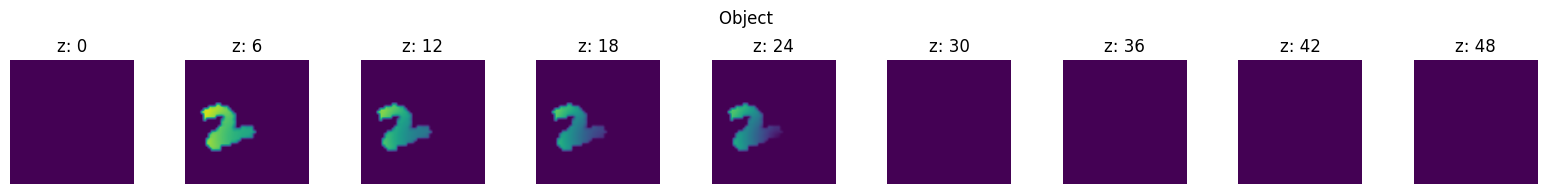

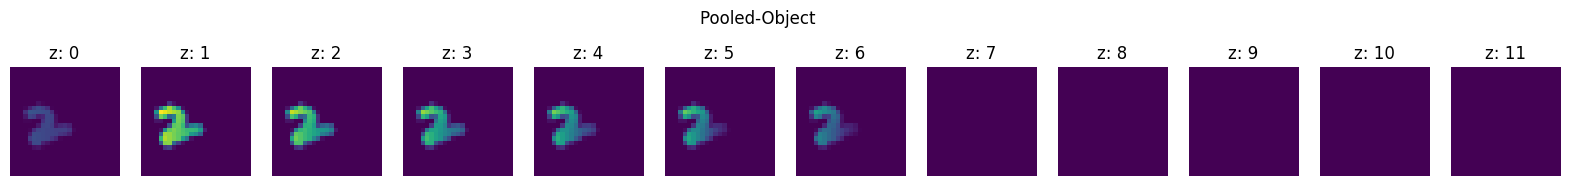

In [1]:
from libs.forward_lib.simulate_data import MnistSimulator

nx, ny, nz = 100, 100, 50
MS = MnistSimulator(nx, ny, nz, up_factor=(1,2,2))
print(MS)

MS.update_data()
MS.visualize_object(vis_planes=True)

MS.reduce_dimension()
MS.visualize_object(vis_planes=True, is_original=False)

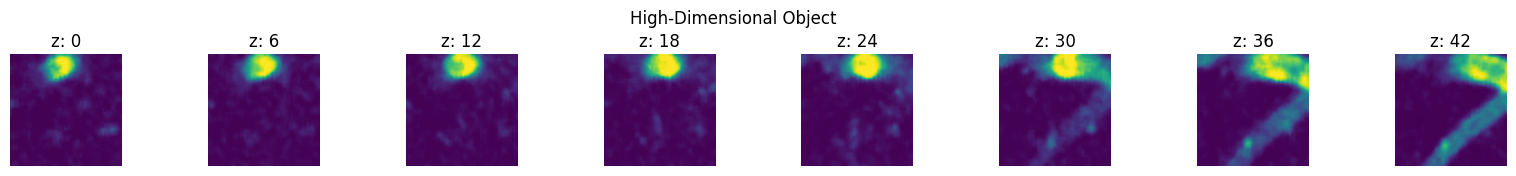

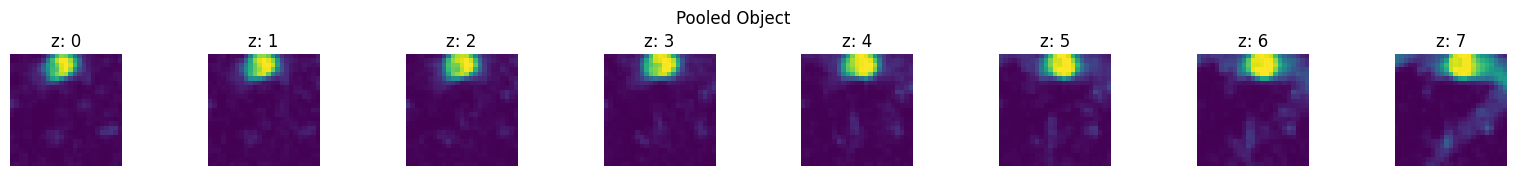

Read Object Parameters
--------------------------
Spatial Dimension	: 100×100×50
Original Dimension	: 50×50×25
Reduced Dimension	: 25×25×12
Raw Data Type		: blood_cell
Device			: cpu



In [12]:
from libs.forward_lib.read_data import ReadData

nx, ny, nz = 100, 100, 50
up_factor = 2

# Initialize the Read Data Model
RD = ReadData(nx, ny, nz, up_factor=up_factor)

# Loading Cellular Data
RD.load_object("blood_cell")

# Visualizing the original Data
RD.visualize_data(is_orginal=True)              # n_planes specify if <8

# Average Pooling Operation To Reduce Dimension
RD.reduce_dimension()

# Visualize the Dimension Reduced Data
RD.visualize_data()                   # n_planes specify if <8
print(RD)

### Microscopic Model

In [15]:
from libs.forward_lib.physical_model_D2NN import PhysicalModel

nx, ny, nz = 100, 100, 50
m = 4
dd_factor = 1
# Initialize the Physical Model
PM = PhysicalModel(nx, ny, nz, m, dd_factor=dd_factor)
PM.init_psf()
PM.D2NN.initialize_D2NN_fields()

# Better Understand the Physical Model
print(PM)

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
Forward Model Specifications
----------------------------------------------
Space Dimension 		: 25.0um × 25.0um × 12.5um
voxel Size 			: 0.25um × 0.25um × 0.25um
D2NN Patterns 			: 4
Measurement Plane		: [25]
Detector Pool size 		: 1×1
Computational Device 		: cpu


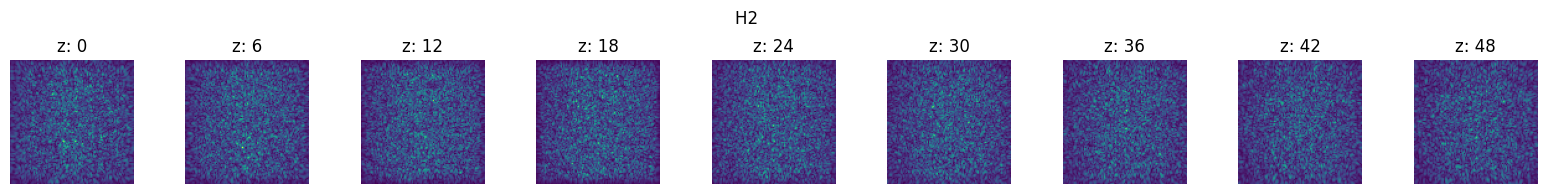

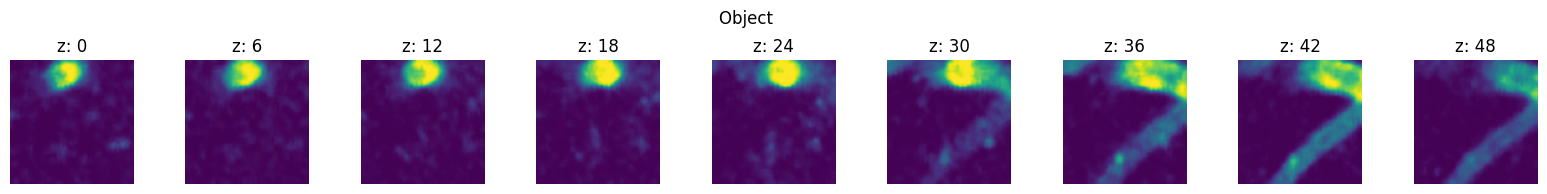

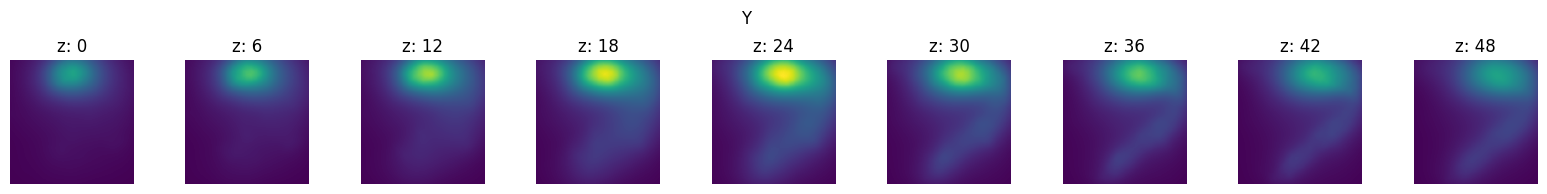

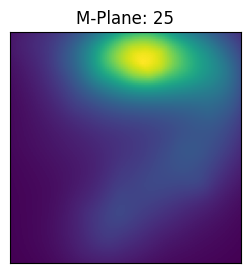

In [16]:
measurements = PM.propagate_object(RD.X, verbose=3)             # verbose: [0, 1, 2, 3]

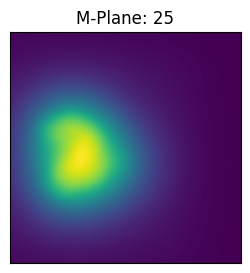

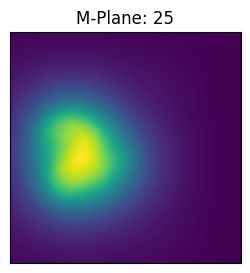

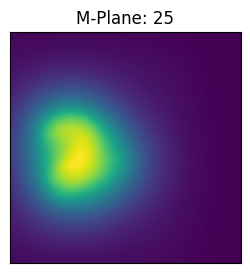

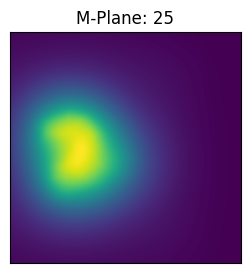

In [17]:
# Measurements from multiple D2NN fields
measurements = PM.extended_propagation(MS.X, verbose=True)

Correlation between measurements

In [19]:
import torch

m_mat = torch.zeros(m, (nx//dd_factor)*(ny//dd_factor))
for i in range(m):
    m_i = measurements[i*(nx//dd_factor)*(ny//dd_factor) : (i+1)*(nx//dd_factor)*(ny//dd_factor)]
    m_mat[i, :] = m_i

print("Correlation Matrix:")
print(torch.corrcoef(m_mat))

Correlation Matrix:
tensor([[1.0000, 0.9999, 0.9989, 0.9958],
        [0.9999, 1.0000, 0.9983, 0.9952],
        [0.9989, 0.9983, 1.0000, 0.9979],
        [0.9958, 0.9952, 0.9979, 1.0000]])


### Field

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 25.0um × 25.0um × 12.5um
voxel Size 			: 0.25um × 0.25um × 0.25um
Computational Device 		: cpu


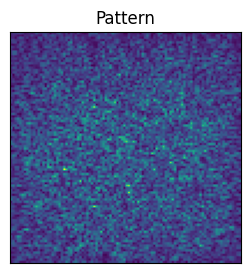

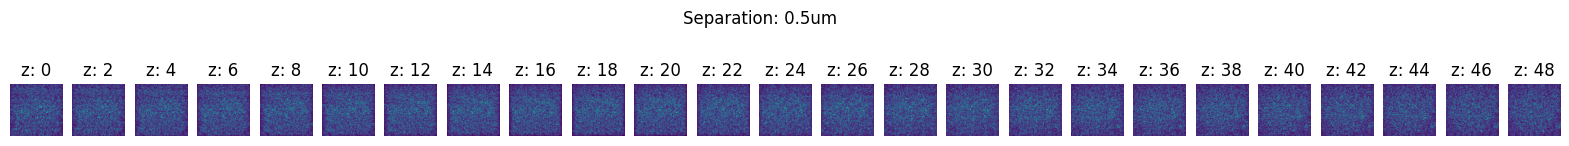

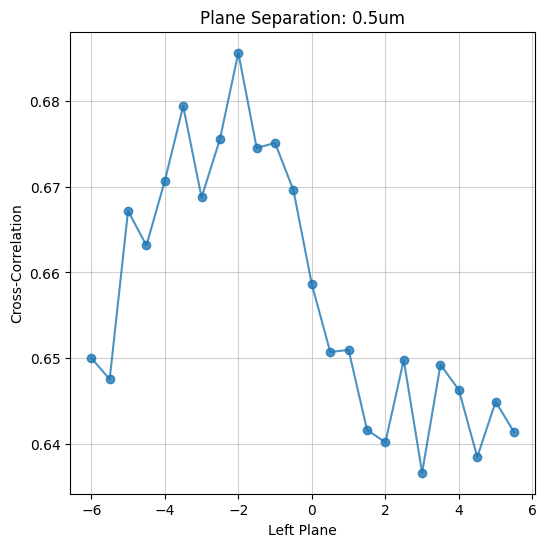

In [6]:
from libs.forward_lib.field_model_D2NN import FieldModel

# Parameter Initialization
nx, ny, nz = 100, 100, 50
FM = FieldModel(nx, ny, nz)

# Model Parameters
print(FM)

# PSF Calculation & Field Propagation
FM.propagate_field()

# Visualizing D2NN pattern
FM.PM.D2NN.visualize_patterns()

# Visualize at Feild at Certain Seperation
FM.visualize_at_separation(separation=0.5)

FM.correlation_measure(separation=0.5)

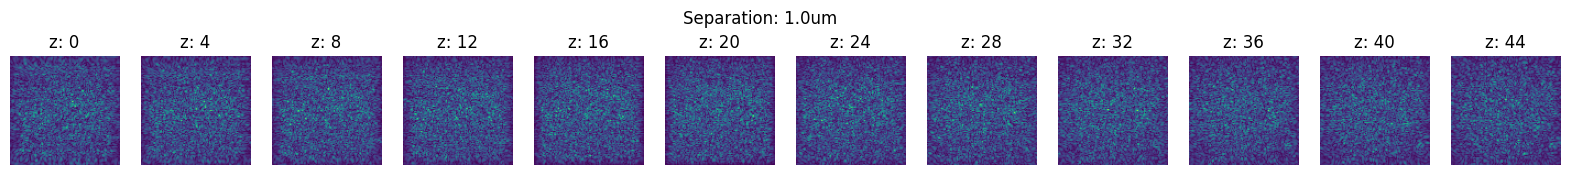

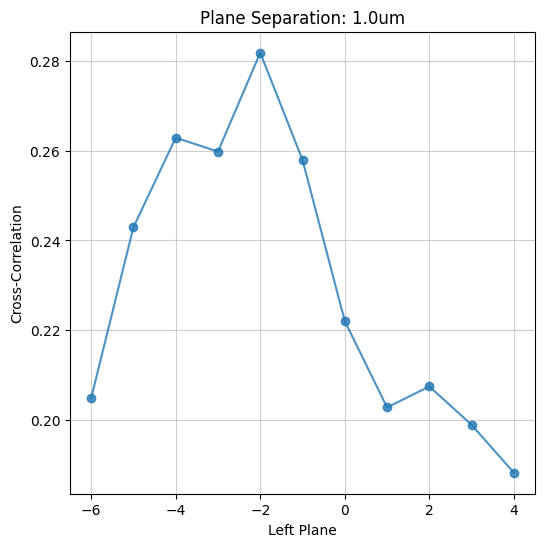

In [7]:
# Visualize at Feild at Certain Seperation
FM.visualize_at_separation(separation=1.0)

FM.correlation_measure(separation=1.0)